# Quick start

For convenience, let's begin by enabling [automatic reloading of modules](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) when they change.

In [1]:
%load_ext autoreload
%autoreload 2

## Import Qiskit Metal

In [ ]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x

## My first Quantum Design (QDesign)

A Quantum Design (``QDesign``) can be selected from the design library `qiskit_metal.designs`. All designs are children of the `QDesign` base class, which defines the basic funcationality of a QDesign. 

We will start with the simple planar QDesign.

```python 
design = designs.DesignPlanar()
```

##### Interactivly view, edit, and simulate QDesign: Metal GUI

To launch the qiskit metal GUI, use the method `MetalGUI`.
```python 
gui = MetalGUI(design)
```


In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

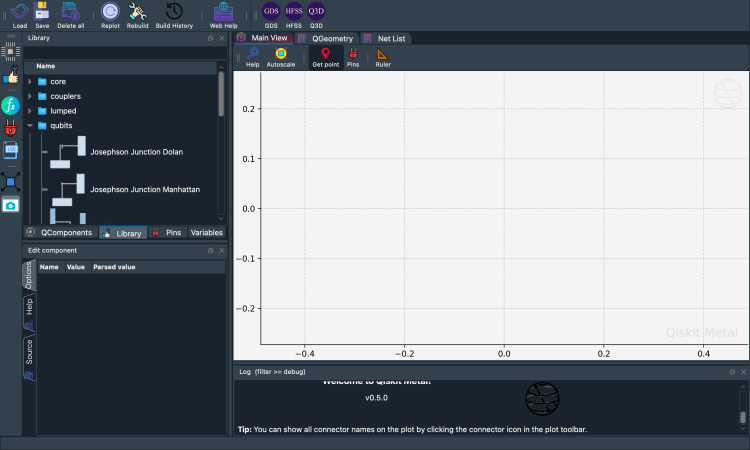

In [5]:
gui.screenshot()

In [6]:
%metal_heading Hello Quantum World!

## My First Quantum Component (QComponent)
### A transmon qubit
We can create a ready-made and optimized transmon qubit from the QLibrary of components.
Qubit qcomponents are stored in the library `qiskit_metal.qlibrary.qubits`. The file that contains the transmon pocket is called `transmon_pocket`,
and the `QComponent` class inside it is `TransmonPocket`.

* Let's create a new qubit by creating an object of this class. 

In [7]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object with name 'Q1'
q1 = TransmonPocket(design, 'Q1')
gui.rebuild()  # rebuild the design and plot

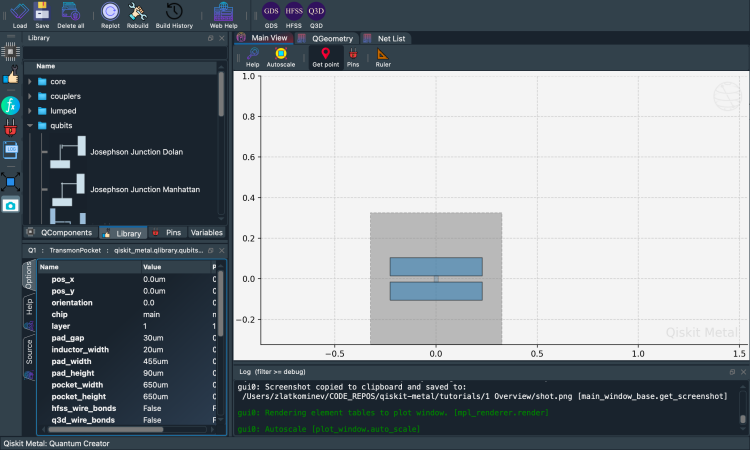

In [8]:
# save screenshot
gui.edit_component('Q1')
gui.autoscale()
gui.screenshot()

Let's see what the Q1 object looks like

In [9]:
q1

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0.0um',                      
  'pos_y'             : '0.0um',                      
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '20um',                       
  'pad_width'         : '455um',                      
  'pad_height'        : '90um',                       
  'pocket_width'      : '650um',                      
  'pocket_height'     : '650um',                      
  'hfss_wire_bonds'   : False,                        
  'q3d_wire_bonds'    : False,                        
  'aedt_q3d_wire_bonds': False,                        
  'aedt_hfss_wire_bonds': False,                        
  'hfss_inductance'   : '10nH',                       
  'hfss_ca

Parsed view of options

#### What are the default options?
The QComponent comes with some default options. The options are used in the `make` function of the QComponent to create the QGeometry you see in the plot above. 
* Options are parsed by Qiskit Metal. 
* You can change them from the GUI or the script API. 

In [10]:
%metal_print How do I edit options?  API or GUI

You can use the GUI to create, edit, plot, modify, quantum components.
Equivalently, you can also do everything from the python API. 
The GUI is just calling the API for you.

In [11]:
# Change options
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '0.25 mm'
q1.options.pad_height = '225 um'
q1.options.pad_width  = '250 um'
q1.options.pad_gap    = '50 um'

# Update the geometry, since we changed the options
gui.rebuild()

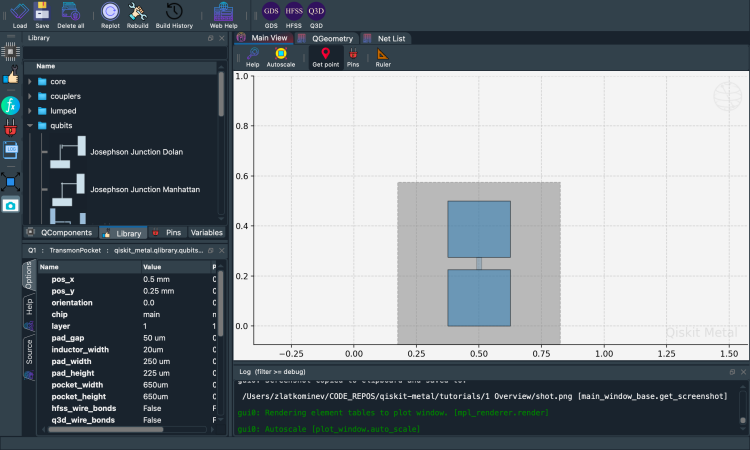

In [12]:
gui.autoscale()
gui.screenshot()

### Where are the QComponents stored?
They are stored in `design.components`. It can be accessed as a dictionary (`design.components['Q1']`) or object (`design.components.Q1`).

In [13]:
q1 = design.components['Q1']

In [14]:
%metal_print Where are the default options?

Object `options` not found.


A QComponent is created with default options.
To find out what these are, use `QComponentClass.get_template_options(design)`

In [15]:
TransmonPocket.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction',
 'aedt_q3d_inductance': 1e-08,
 'aedt_q3d_capacitance': 0,
 'aedt_hf

In [16]:
%metal_print How do I change the default options

Now let us change the default options we will use to create the transmon

In [17]:
# THIS ISN'T CHANGING THE DEFAULT OPTIONS - NEEDS UPDATE
q1.options.pos_x = '0.5 mm'
q1.options.pos_y = '250 um'

# Rebubild for changes to propagate
gui.rebuild()

In [18]:
%metal_print How do I work with units? <br><br> (parse options and values)

#### Parsing strings into floats

Use the `design.parse_value` or `QComponent.parse_value` (such as `q1.parse_value`). The two functions serve the same purpose. 

In [19]:
print('Design default units for length: ', design.get_units())
print('\nExample 250 micron parsed to design units:', design.parse_value('250 um'), design.get_units())

dictionary = {'key_in_cm': '1.2 cm', 'key_in_microns': '50 um'}
print('\nExample parse dict:', design.parse_value(dictionary))

a_list = ['1m', '1mm', '1um', '1 nm']
print('\nExample parse list:', design.parse_value(a_list))

Design default units for length:  mm

Example 250 micron parsed to design units: 0.25 mm

Example parse dict: {'key_in_cm': 12.0, 'key_in_microns': 0.05}

Example parse list: [1000.0, 1, 0.001, 1.0000000000000002e-06]


#### Some basic arithmetic and parsing

In [20]:
design.parse_value('2 * 2um')

0.004

In [21]:
design.parse_value('2um + 5um')

0.007

In [22]:
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,...,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name,aedt_q3d_inductance,aedt_q3d_capacitance,aedt_hfss_inductance,aedt_hfss_capacitance
0,1,rect_jj,"LINESTRING (0.5 0.225, 0.5 0.275)",1,False,False,main,0.02,10nH,0,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0


### Advanced: parse into arrays, list, etc.  
Can use python syntax inside options. Parse uses pythonic `ast_eval`.

In [23]:
#### List
print('* '*10+' LIST '+'* '*10,'\n')
str_in = "[1,2,3,'10um']"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

str_in = "['2*2um', '2um + 5um']"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

#### Dict
print('* '*10+' DICT '+'* '*10,'\n')

str_in = "{'key1': '100um', 'key2': '1m'}"
out = design.parse_value(str_in)
print(f'Parsed output:\n {str_in}  ->  {out} \n Out type: {type(out)}\n')

* * * * * * * * * *  LIST * * * * * * * * * *  

Parsed output:
 [1,2,3,'10um']  ->  [1, 2, 3, 0.01] 
 Out type: <class 'list'>

Parsed output:
 ['2*2um', '2um + 5um']  ->  [0.004, 0.007] 
 Out type: <class 'list'>

* * * * * * * * * *  DICT * * * * * * * * * *  

Parsed output:
 {'key1': '100um', 'key2': '1m'}  ->  {'key1': 0.1, 'key2': 1000.0} 
 Out type: <class 'addict.addict.Dict'>



## How do I overwrite QComponents? 

To enable component overwrite of components with the same name, use the following cell 

In [24]:
design.overwrite_enabled = True

In [25]:
%metal_heading Quantum pins: QPins!

### QPins: The dynamic way to connect qcomponents 

The component designer can define pins. Pins can be used to link components together. For example, two transmons can each have a pin. The two pins can be connected by CPWs, as we will show below. 

First, let us add pins to the transmon. 
We will add 4 pins called `a`, `b`, `c`, and `d`. 
Each pin will be at a different location (corner of the transmon), defined by the options `loc_W` and `loc_H`.

In [26]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

design.delete_all_components()

options = dict(
    pad_width = '425 um',
    pocket_height = '650um',
    connection_pads = dict(  # pin connectors
        a = dict(loc_W=+1,loc_H=+1),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

q1 = TransmonPocket(design, 'Q1', options = dict(pos_x='+0.5mm', pos_y='+0.5mm', **options))

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


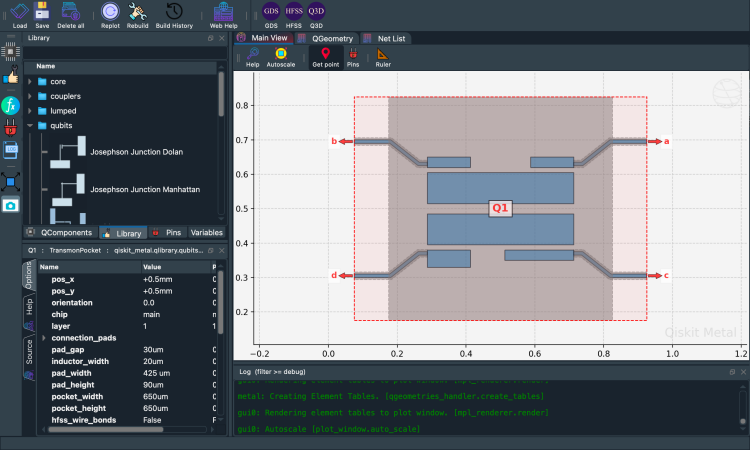

In [27]:
# Take a screenshot with the component highlighted and the pins shown
gui.rebuild()
gui.autoscale()
gui.edit_component('Q1')
gui.zoom_on_components(['Q1'])
gui.highlight_components(['Q1'])
gui.screenshot()

To access a pin

In [28]:
q1.pins.a
q1.pins['a']

{'points': [array([0.925, 0.7  ]), array([0.925, 0.69 ])],
 'middle': array([0.925, 0.695]),
 'normal': array([1., 0.]),
 'tangent': array([0., 1.]),
 'width': 0.01,
 'gap': 0.006,
 'chip': 'main',
 'parent_name': 2,
 'net_id': 0,
 'length': 0}

### How do I edit the component source code and see changes immidietly? 
If you have selected a QComponent, you can call the button that says edit source in the GUI. 
Once selected, you could also call the same function from the code.

In [29]:
gui.edit_component('Q1')


This will pop open a new source editor window, you can change the source on the fly. 
* Make sure you press the `Rebuild component` button in the source editor when you are ready to save and make your changes.

In [30]:
%metal_heading My first quantum chip

## Creating a whole chip of qubit with connectors 

Let's now create a a whole chip. In the following, you will pass options to create 4 transmon qubits in a ring.
First let us clear all QComponents in the design. 

In [31]:
design.delete_all_components()
gui.rebuild() # refresh

In [32]:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Allow running the same cell here multiple times to overwrite changes
design.overwrite_enabled = True

## Custom options for all the transmons
options = dict(
    # Some options we want to modify from the defaults
    # (see below for defaults)
    pad_width = '425 um',
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        a = dict(loc_W=+1,loc_H=+1),
        b = dict(loc_W=-1,loc_H=+1, pad_height='30um'),
        c = dict(loc_W=+1,loc_H=-1, pad_width='200um'),
        d = dict(loc_W=-1,loc_H=-1, pad_height='50um')
    )
)

## Create 4 transmons

q1 = TransmonPocket(design, 'Q1', options = dict(
    pos_x='+2.55mm', pos_y='+0.0mm', **options))
q2 = TransmonPocket(design, 'Q2', options = dict(
    pos_x='+0.0mm', pos_y='-0.9mm', orientation = '90', **options))
q3 = TransmonPocket(design, 'Q3', options = dict(
    pos_x='-2.55mm', pos_y='+0.0mm', **options))
q4 = TransmonPocket(design, 'Q4', options = dict(
    pos_x='+0.0mm', pos_y='+0.9mm', orientation = '90', **options))

## Rebuild the design
gui.rebuild()
gui.autoscale()

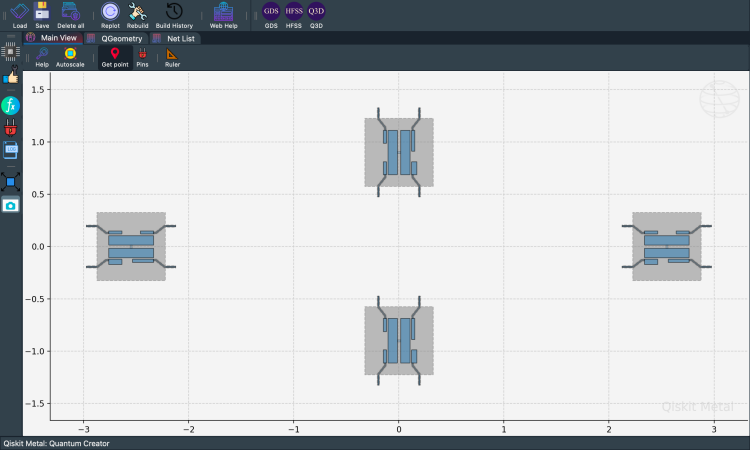

In [33]:
gui.toggle_docks(True)
gui.screenshot()

In [34]:
%metal_heading Connecting QPins with coplanar waveguides (CPWs)

Let's import the basic cpw QComponent from the QLibrary. It is a class called `RouteMeander`.
We can see its default options using `RouteMeander.get_template_options(design)`

In [35]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
RouteMeander.get_template_options(design)

{'chip': 'main',
 'layer': '1',
 'pin_inputs': {'start_pin': {'component': '', 'pin': ''},
  'end_pin': {'component': '', 'pin': ''}},
 'fillet': '0',
 'lead': {'start_straight': '0mm',
  'end_straight': '0mm',
  'start_jogged_extension': '',
  'end_jogged_extension': ''},
 'total_length': '7mm',
 'trace_width': 'cpw_width',
 'meander': {'spacing': '200um', 'asymmetry': '0um'},
 'snap': 'true',
 'prevent_short_edges': 'true',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'aedt_q3d_wire_bonds': False,
 'aedt_hfss_wire_bonds': False}

We can now modify the options and connect all four qubits. Since this is repetitive, you can define a function to wrap up the repetitive steps. Here we will call this `connect`. This function creates a `RouteMeander` QComponent class.

In [36]:
options = Dict(
    meander=Dict(
        lead_start='0.1mm',
        lead_end='0.1mm',
        asymmetry='0 um')
)


def connect(component_name: str, component1: str, pin1: str, component2: str, pin2: str,
            length: str,
            asymmetry='0 um', flip=False):
    """Connect two pins with a CPW."""
    myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component=component1,
                pin=pin1),
            end_pin=Dict(
                component=component2,
                pin=pin2)),
        lead=Dict(
            start_straight='0.13mm'
        ),
        total_length=length,
    fillet = '90um')
    myoptions.update(options)
    myoptions.meander.asymmetry = asymmetry
    myoptions.meander.lead_direction_inverted = 'true' if flip else 'false'
    return RouteMeander(design, component_name, myoptions)


asym = 150
cpw1 = connect('cpw1', 'Q1', 'd', 'Q2', 'c', '6.0 mm', f'+{asym}um')
cpw2 = connect('cpw2', 'Q3', 'c', 'Q2', 'a', '6.1 mm', f'-{asym}um', flip=True)
cpw3 = connect('cpw3', 'Q3', 'a', 'Q4', 'b', '6.0 mm', f'+{asym}um')
cpw4 = connect('cpw4', 'Q1', 'b', 'Q4', 'd', '6.1 mm', f'-{asym}um', flip=True)

gui.rebuild()
gui.autoscale()

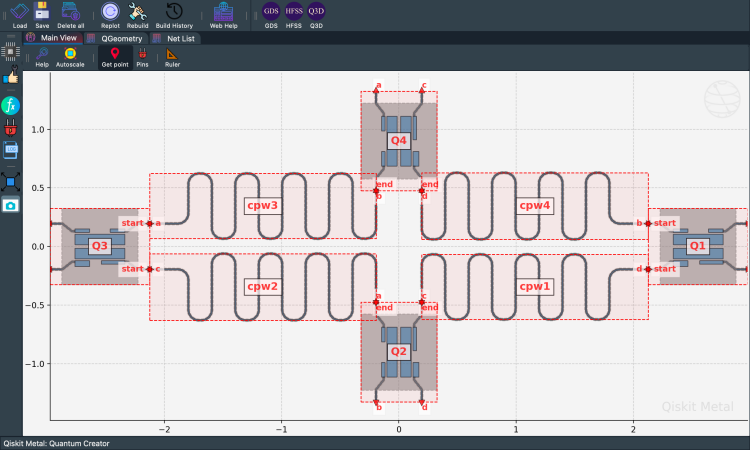

In [37]:
gui.toggle_docks(True)
gui.highlight_components(['Q1','Q2','Q3','Q4','cpw1','cpw2','cpw3','cpw4'])
gui.screenshot()

In [38]:
design.components.keys()

['Q1', 'Q2', 'Q3', 'Q4', 'cpw1', 'cpw2', 'cpw3', 'cpw4']

We can access the created CPW from the design too.

In [39]:
design.components.cpw2

name:    cpw2
class:   RouteMeander          
options: 
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'pin_inputs'        : {
       'start_pin'         : {
            'component'         : 'Q3',                         
            'pin'               : 'c',                          
                             },
       'end_pin'           : {
            'component'         : 'Q2',                         
            'pin'               : 'a',                          
                             },
                        },
  'fillet'            : '90um',                       
  'lead'              : {
       'start_straight'    : '0.13mm',                     
       'end_straight'      : '0mm',                        
       'start_jogged_extension': '',                           
       'end_jogged_extension': '',                           
                        },
  'total_length'      : '6.1 mm',        

We can see all the pins

In [40]:
%metal_heading Variables in options

## Variables 

The design can have variables, which can be used in the component options.

In [41]:
design.variables.cpw_width = '10um'
design.variables.cpw_gap = '6um'
gui.rebuild()

For example, we can all qubit pads using the variables.  

In [42]:
cpw1.options.lead.end_straight = '100um'
cpw2.options.lead.end_straight = '100um'
cpw3.options.lead.end_straight = '100um'
cpw4.options.lead.end_straight = '100um'

In [43]:
# Set variables in the design
design.variables.pad_width = '450 um'
design.variables.cpw_width = '25 um'
design.variables.cpw_gap = '12 um'

# Assign variables to component options
q1.options.pad_width = 'pad_width'
q2.options.pad_width = 'pad_width'
q3.options.pad_width = 'pad_width'
q4.options.pad_width = 'pad_width'

# Rebuild all components and refresh the gui
gui.rebuild()
gui.autoscale()

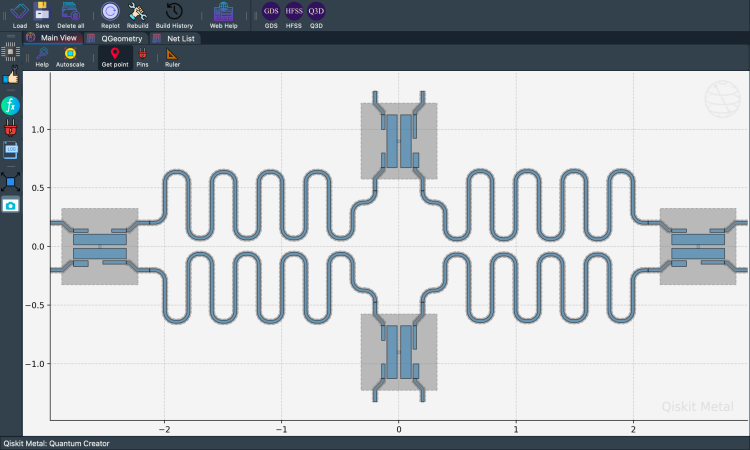

In [44]:
gui.screenshot()

In [45]:
%metal_heading Render to GDS

In [46]:
gds = design.renderers.gds
gds.options.path_filename

'../resources/Fake_Junctions.GDS'

In [47]:
gds.options.path_filename = '../resources/Fake_Junctions.GDS'

In [48]:
q1.options

{'pos_x': '+2.55mm',
 'pos_y': '+0.0mm',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {'a': {'pad_gap': '15um',
   'pad_width': '125um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H': 1},
  'b': {'pad_gap': '15um',
   'pad_width': '125um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': -1,
   'loc_H': 1},
  'c': {'pad_gap': '15um',
   'pad_width': '200um',
   'pad_height': '30um',
   'pad_cpw_shift': '5um',
   'pad_cpw_extent': '25um',
   'cpw_width': 'cpw_width',
   'cpw_gap': 'cpw_gap',
   'cpw_extend': '100um',
   'pocket_extent': '5um',
   'pocket_rise': '65um',
   'loc_W': 1,
   'loc_H

Note the GDS entry for the JJ cell name from a GDS external file
```json
    'gds_cell_name': 'my_other_junction'
```
This is pulled form the following file and added on export to the GDS

## Josephon Junction GDS file path: gds.options.path_filename

Need to give the correct path and filename that has gds formatted cells.
An example is located in the repositary under resources directory.
The cells are "junctions" that would be placed inside qubits.  Fake_Junctions has 
three cells named: "Fake_Junction_01", "Fake_Junction_02", "my_other_junction".  

Example:  When creating transmon the default_option for gds_cell_name is "my_other_junction".

In [52]:
gds.lib

In [ ]:
gds.options.path_filename = "../resources/Fake_Junctions.GDS"
gds.import_junction_gds_file(gds.lib) # load into pour library

True

This function will read the file again, and print out the cells in it.
It will also render the cells as an SVG inline if run in a Jupyter notebook.

imported_lib name: LIB
imported_lib unit: 1e-06
imported_lib precision: 1e-09


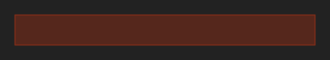


=== my_other_junction ===
bbox: ((-15.0, -1.5), (15.0, 1.5))
paths: 0
polygons: 1
  - poly(n=4)
refs: 0
props: 0
=== end ===



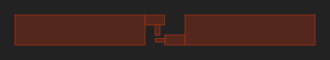


=== FakeJunction_02 ===
bbox: ((-15.0, -1.5), (15.0, 1.5))
paths: 0
polygons: 6
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
refs: 0
props: 0
=== end ===



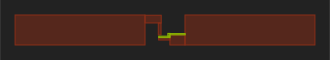


=== FakeJunction_01 ===
bbox: ((-15.0, -1.5030000000000001), (15.0, 1.5))
paths: 0
polygons: 9
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
  - poly(n=4)
refs: 0
props: 0
=== end ===



In [ ]:
gds.show_imported_junction_gds() # Shows gds.imported_junction_gds

In [58]:
# Turn off cheesing (we will explain in a minute what this is)
gds.options.cheese.view_in_file = Dict(main={})
gds.options.no_cheese.view_in_file = Dict(main={})

In [59]:
design.renderers.gds.export_to_gds("awesome_design.gds")

01:05AM 52s WARNING [_give_rotation_center_twopads]: In junction table, component=Q1 with name=rect_jj has width=0.02 smaller than cell dimension=3.0.
01:05AM 52s WARNING [_give_rotation_center_twopads]: In junction table, component=Q2 with name=rect_jj has width=0.02 smaller than cell dimension=3.0.
01:05AM 52s WARNING [_give_rotation_center_twopads]: In junction table, component=Q3 with name=rect_jj has width=0.02 smaller than cell dimension=3.0.
01:05AM 52s WARNING [_give_rotation_center_twopads]: In junction table, component=Q4 with name=rect_jj has width=0.02 smaller than cell dimension=3.0.
01:05AM 52s WARNING [_check_either_cheese]: layer=1 is not in chip=main either in no_cheese_view_in_file or cheese_view_in_file from self.options.


1

In [ ]:
# Load save file
import gdstk
lib = gdstk.read_gds("awesome_design.gds")
gds.debug_summarize_gds_library(lib, show=True)

We just upgraded here to gdstk from gdspy, and are validating all the outputs of the GDS renderer after this massive update. There may be an issue with the scaling of the exported junction sizes and if the cheesing is turned on. Check the github issues, we will update the file here soon. 

In [62]:
%metal_heading More QComponents

Basic and crazy shapes. 

See their source code to see how to get started on a few simple examples.

In [63]:
from qiskit_metal.qlibrary.sample_shapes.n_square_spiral import NSquareSpiral
# print(NSquareSpiral.get_template_options(design))
ops = {
    'n': '10',
    'width': '10um',
    'radius': '100um',
    'gap': '22um',
    'pos_x': '0.65mm',
    'pos_y': '2.2mm',
    'orientation': '0',
    'subtract': 'False'}
NSquareSpiral(design, 'spiral', ops)
NSquareSpiral(design, 'spiral_cut', {**ops, **dict(subtract=True, width='22um', gap='10um')})
gui.rebuild()

To see source, try ``??NSquareSpiral``. Go to the actual source file and edit it, copy it, or edit it in the GUI using the `Edit Source` button.

In [64]:
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
# CpwStraightLine.get_template_options(design)
myoptions = Dict(
        pin_inputs=Dict(
            start_pin=Dict(
                component='Q4',
                pin='c'),
            end_pin=Dict(
                component='spiral',
                pin='spiralPin'))
        )


RouteStraight(design, 'cpw_s1', myoptions);
gui.rebuild()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


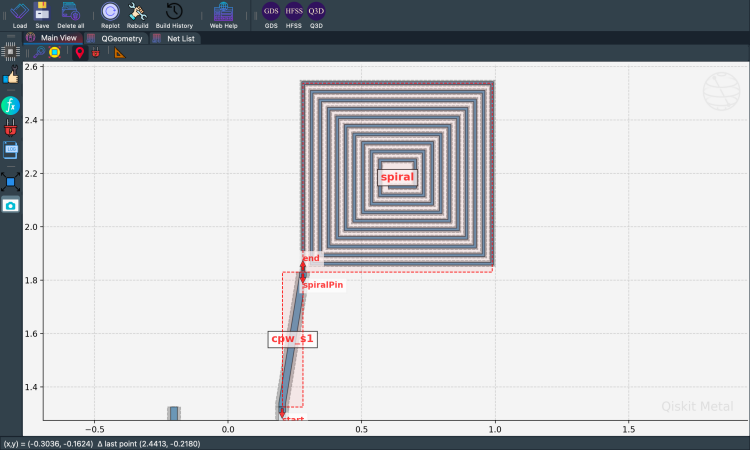

In [65]:
qcomponents = ['spiral', 'cpw_s1']
gui.highlight_components(qcomponents)
gui.zoom_on_components(qcomponents)
gui.screenshot()

####  NGon

In [66]:
from qiskit_metal.qlibrary.sample_shapes.n_gon import NGon
# display(NGon.get_template_options(design))
ops = {
    'n': '5',
    'radius': '250um',
    'pos_x': '-0.85mm',
    'pos_y': '2.0mm',
    'orientation': '15',
    'subtract': 'False',
    'helper': 'False',
    'chip': 'main',
    'layer': '1'}
NGon(design, 'ngon', ops)
NGon(design, 'ngon_negative', {**ops, **dict(subtract=True, radius='350um')})
gui.rebuild()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


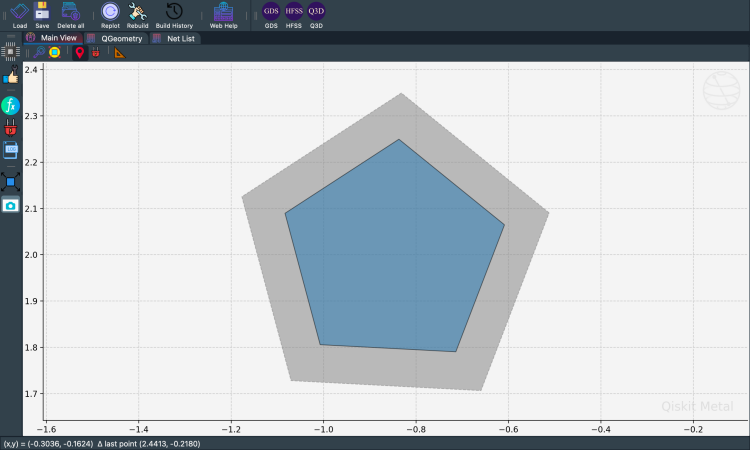

In [67]:
gui.zoom_on_components(['ngon_negative'])
gui.screenshot()

In [68]:
from qiskit_metal.qlibrary.sample_shapes.circle_raster import CircleRaster
display(CircleRaster.get_template_options(design))

ops = { 'radius': '300um',
        'pos_x': '-1.5mm',
        'pos_y': '2mm',
        'resolution': '16',
        'cap_style': 'round',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1'}
CircleRaster(design, 'CircleRaster', ops)
gui.rebuild()

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'radius': '300um',
 'resolution': '16',
 'cap_style': 'round',
 'subtract': 'False',
 'helper': 'False'}

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


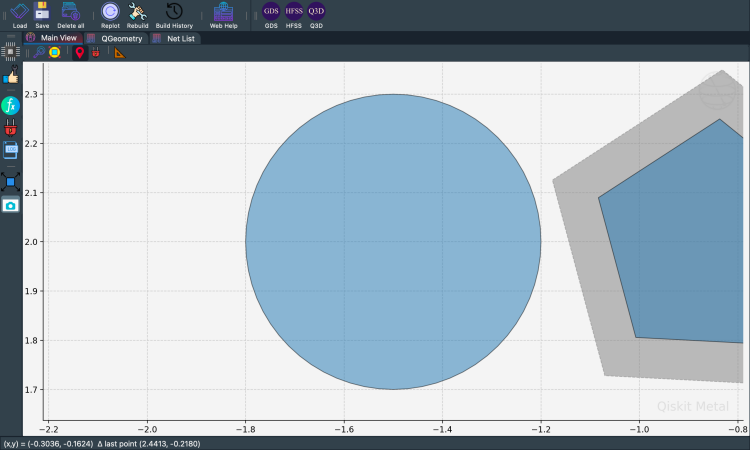

In [69]:
gui.zoom_on_components(['CircleRaster'])
gui.screenshot()

In [70]:
from qiskit_metal.qlibrary.sample_shapes.rectangle_hollow import RectangleHollow
display(RectangleHollow.get_template_options(design))

ops = { 'width': '500um',
        'height': '300um',
        'pos_x': '-2.3mm',
        'pos_y': '2mm',
        'orientation': '0',
        'subtract': 'False',
        'helper': 'False',
        'chip': 'main',
        'layer': '1',
        'inner': {  'width': '250um',
                    'height': '100um',
                    'offset_x': '40um',
                    'offset_y': '-20um',
                    'orientation': '15'}}
RectangleHollow(design, 'RectangleHollow', ops)
gui.rebuild()

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'width': '500um',
 'height': '300um',
 'subtract': 'False',
 'helper': 'False',
 'inner': {'width': '250um',
  'height': '100um',
  'offset_x': '40um',
  'offset_y': '-20um',
  'orientation': '15'}}

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


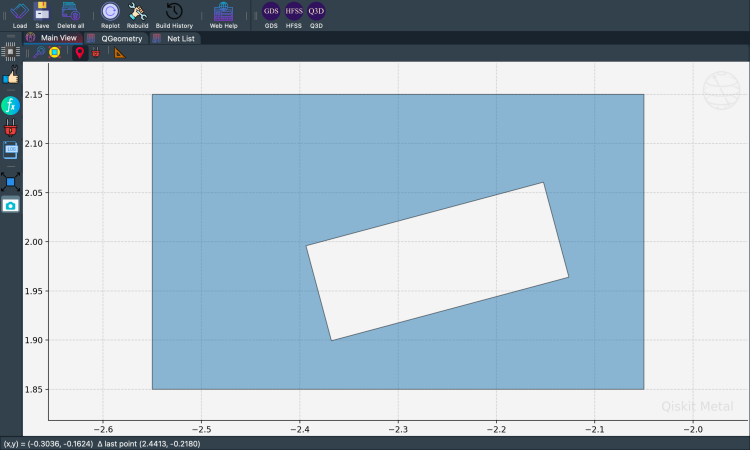

In [71]:
gui.zoom_on_components(['RectangleHollow'])
gui.screenshot()

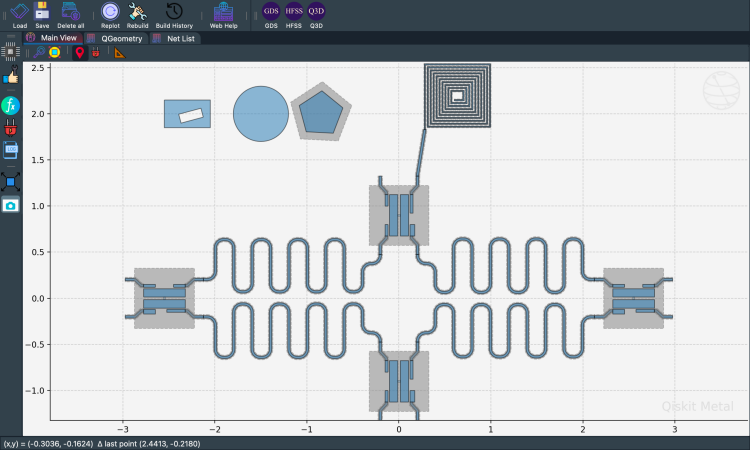

In [72]:
gui.autoscale()
gui.screenshot()

In [73]:
%metal_heading The geometry of QComponent: QGeometry

### Geometric boundary of a qcomponent?
Return the boundry box of the geometry, for example: `q1.qgeometry_bounds()`.  
The function returns a tuple containing (minx, miny, maxx, maxy) bound values
for the bounds of the component as a whole.

In [74]:
for name, qcomponent in design.components.items():
    print(f"{name:10s} : {qcomponent.qgeometry_bounds()}")

Q1         : [ 2.125 -0.325  2.975  0.325]
Q2         : [-0.325 -1.325  0.325 -0.475]
Q3         : [-2.975 -0.325 -2.125  0.325]
Q4         : [-0.325  0.475  0.325  1.325]
cpw1       : [ 0.2025     -0.63618364  2.125      -0.06881636]
cpw2       : [-2.125      -0.64243364 -0.2025     -0.06256636]
cpw3       : [-2.125       0.06881636 -0.2025      0.63618364]
cpw4       : [0.2025     0.06256636 2.125      0.64243364]
spiral     : [0.28  1.83  0.988 2.538]
spiral_cut : [0.28  1.83  0.988 2.538]
cpw_s1     : [0.2025 1.325  0.28   1.83  ]
ngon       : [-1.08339511  1.79033236 -0.60851854  2.24965738]
ngon_negative : [-1.17675315  1.7064653  -0.51192596  2.34952034]
CircleRaster : [-1.8  1.7 -1.2  2.3]
RectangleHollow : [-2.55  1.85 -2.05  2.15]


### What is QGeometry? 

We can get all the QGeometry of a QComponent. There are several kinds, such as `path` and `poly`. Let us look at all the polygons used to create qubit `q1`

In [75]:
q1.qgeometry_table('poly')

,component,name,geometry,layer,subtract,helper,chip,fillet
0,3,pad_top,"POLYGON ((2.325 0.015, 2.775 0.015, 2.775 0.10...",1,False,False,main,NaN
1,3,pad_bot,"POLYGON ((2.325 -0.105, 2.775 -0.105, 2.775 -0...",1,False,False,main,NaN
2,3,rect_pk,"POLYGON ((2.225 -0.325, 2.875 -0.325, 2.875 0....",1,True,False,main,NaN
3,3,a_connector_pad,"POLYGON ((2.65 0.12, 2.775 0.12, 2.775 0.15, 2...",1,False,False,main,NaN
4,3,b_connector_pad,"POLYGON ((2.45 0.12, 2.325 0.12, 2.325 0.15, 2...",1,False,False,main,NaN
5,3,c_connector_pad,"POLYGON ((2.575 -0.12, 2.775 -0.12, 2.775 -0.1...",1,False,False,main,NaN
6,3,d_connector_pad,"POLYGON ((2.45 -0.12, 2.325 -0.12, 2.325 -0.17...",1,False,False,main,NaN


Paths are lines. These can have a width.

In [76]:
q1.qgeometry_table('path')

,component,name,geometry,layer,subtract,helper,chip,width,fillet,hfss_wire_bonds,q3d_wire_bonds,aedt_q3d_wire_bonds,aedt_hfss_wire_bonds
0,3,a_wire,"LINESTRING (2.775 0.1375, 2.8 0.1375, 2.87 0.2...",1,False,False,main,0.025,NaN,False,False,False,False
1,3,a_wire_sub,"LINESTRING (2.775 0.1375, 2.8 0.1375, 2.87 0.2...",1,True,False,main,0.049,NaN,False,False,False,False
2,3,b_wire,"LINESTRING (2.325 0.1375, 2.3 0.1375, 2.23 0.2...",1,False,False,main,0.025,NaN,False,False,False,False
3,3,b_wire_sub,"LINESTRING (2.325 0.1375, 2.3 0.1375, 2.23 0.2...",1,True,False,main,0.049,NaN,False,False,False,False
4,3,c_wire,"LINESTRING (2.775 -0.1375, 2.8 -0.1375, 2.87 -...",1,False,False,main,0.025,NaN,False,False,False,False
5,3,c_wire_sub,"LINESTRING (2.775 -0.1375, 2.8 -0.1375, 2.87 -...",1,True,False,main,0.049,NaN,False,False,False,False
6,3,d_wire,"LINESTRING (2.325 -0.1375, 2.3 -0.1375, 2.23 -...",1,False,False,main,0.025,NaN,False,False,False,False
7,3,d_wire_sub,"LINESTRING (2.325 -0.1375, 2.3 -0.1375, 2.23 -...",1,True,False,main,0.049,NaN,False,False,False,False


Junction table holds information about Quantum juctions. Placement is defined by LineString and width. 

In [77]:
q1.qgeometry_table('junction')

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,...,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name,aedt_q3d_inductance,aedt_q3d_capacitance,aedt_hfss_inductance,aedt_hfss_capacitance
0,3,rect_jj,"LINESTRING (2.55 -0.015, 2.55 0.015)",1,False,False,main,0.02,10nH,0,...,0.000007,10nH,0,0,0.000007,my_other_junction,1.000000e-08,0,1.000000e-08,0


In [78]:
%metal_heading Qiskit Metal Version

In [79]:
metal.about();


Qiskit Metal        0.5.0

Basic
____________________________________
 Python              3.11.14 (main, Dec  5 2025, 21:28:33) [Clang 21.1.4 ]
 Platform            Darwin arm64
 Installation path   /Users/zlatkominev/CODE_REPOS/qiskit-metal/qiskit_metal

Packages
____________________________________
 Numpy               1.26.4
 Qutip               5.2.2

Rendering
____________________________________
 Matplotlib          3.10.7

GUI
____________________________________
 PySide6 version     6.10.1
 Qt version          6.10.1
 SIP version         Not installed

IBM Quantum Team


Can close Metal GUI from both notebook and GUI.

In [ ]:
# gui.main_window.close()

## Appendix - GDS Cheesing: What It Is and How the Renderer Implements It

### what “cheesing” means in mask design

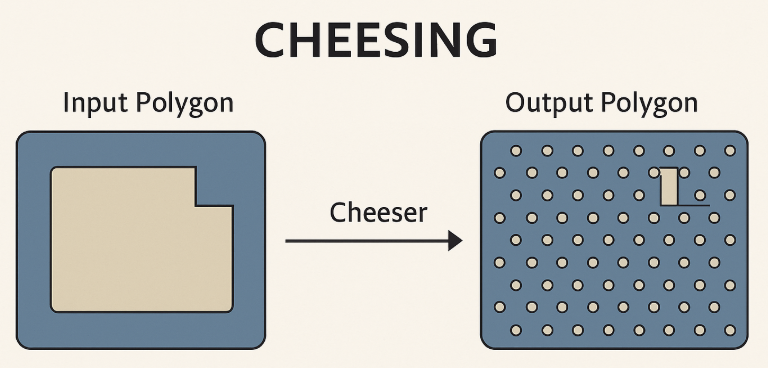

Cheesing is the practice of punching a regular pattern of small holes into large metal areas (typically the ground plane). the holes make the metal look like swiss cheese, hence the name.

cheesing reduces fabrication issues such as:

* film stress and cracking,
* charging during lithography,
* non-uniform etching,
* rule violations caused by large continuous metal regions.

small holes mitigate these problems while leaving microwave behavior essentially unchanged.

### the two components: `cheese` and `no_cheese`

cheesing relies on two option blocks in the renderer:

1. **`cheese`**: defines where holes *should* be created.
2. **`no_cheese`**: defines regions where holes are *not allowed*.

both have their own datatypes, sizes, spacing, and visibility settings:

```python
gds.options.cheese
gds.options.no_cheese
```

### how the renderer decides whether to cheese a layer

cheesing is activated only if the layer is marked in:

```python
gds.options.cheese.view_in_file[chip][layer]
gds.options.no_cheese.view_in_file[chip][layer]
```

if neither entry exists for a given layer, cheesing is skipped.

### step 1: determine ground-plane regions

before cheesing starts, the renderer constructs the metal ground plane geometry for each chip and layer:

* shapes with `subtract=True` cut holes in the ground plane,
* shapes with `subtract=False` sit on top of it.

this yields a unified understanding of the metal layout for the layer.

### step 2: generate the “no-cheese” halo

this step computes regions where holes *must not* be placed.

it works by:

* collecting all shapes that cut into the ground plane,
* converting polylines into buffered polygons when needed,
* unifying them into a single shape,
* expanding them outward using `no_cheese.buffer` to create a halo,
* clipping this halo to the chip boundary.

the resulting multipolygon forms a keep-out mask for cheesing.

### step 3: tile the chip with holes

if cheesing is enabled, the renderer lays out a hole grid across the chip:

* grid spacing is defined by `delta_x` and `delta_y`,
* hole size comes from `cheese_0_x`, `cheese_0_y` or `cheese_1_radius`,
* hole shape is rectangular or circular based on `shape`,
* holes near the chip edges (`edge_nocheese`) are removed,
* holes that fall inside “no-cheese” regions are removed.

the resulting holes are added to gds on the appropriate datatype.

### step 4: integrate holes into the final mask

cheese holes are merged differently depending on mask type:

* **positive mask**: ground plane minus holes,
* **negative mask**: inverse metal + hole logic.

this is done at the cell level so each `chip_layer` cell gets the correct geometry.

### how to disable cheesing entirely

no renderer code needs modification. simply clear the visibility settings:

```python
gds.options.cheese.view_in_file = Dict(main={})
gds.options.no_cheese.view_in_file = Dict(main={})
```

with no layers listed, cheesing logic never runs.

### summary

the renderer’s cheesing pipeline is:

1. compute the ground plane,
2. compute no-cheese keep-out zones,
3. generate holes and filter them,
4. merge into positive or negative mask.

cheesing improves manufacturability while keeping electrical performance intact, and can be turned on/off per chip and per layer via simple configuration options.

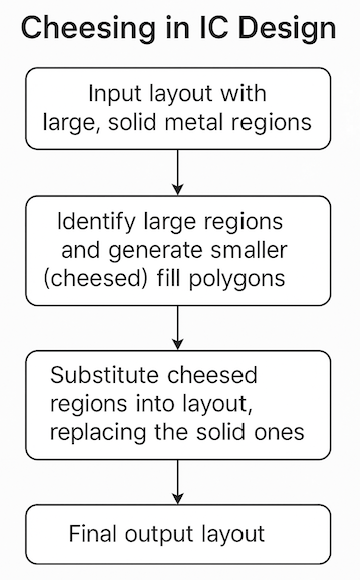

